In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image
import time
import copy
import os

In [2]:
transform = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([ 0.688,  0.499,  0.449], [ 0.236, 0.184,  0.179])
        ])

In [3]:
data_dir = 'sample_data'
model_path = 'model\\res101_with_tumor.pt'
classes= ('Leukoplakia', 'Benign', 'Malignant', 'Normal', 'Vocal nodules')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.resnet101(pretrained=False)
model.fc = nn.Linear(2048, 5)
model = nn.DataParallel(model)
model.load_state_dict(torch.load(model_path, map_location='cpu'))
model = model.to(device)
model.eval()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): C

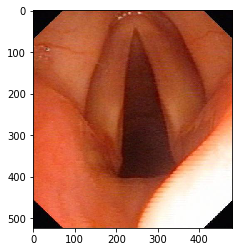

In [5]:
image_path =  os.path.join(data_dir, 'Normal.jpg')
image = Image.open(image_path)
plt.imshow(image)

In [6]:
softmax = nn.Softmax(dim = 1)
with torch.no_grad():
    inputs = transform(image)
    inputs = inputs.unsqueeze(0)
    inputs = inputs.to(device)
    outputs = model(inputs)

    pred = int(np.argmax(outputs.data.cpu().numpy(),1))
    prob = softmax(outputs).cpu().numpy()[0][pred]
    print('Predited as {} with probability of {}'.format(classes[pred], prob))

Predited as Normal with probability of 0.9998550415039062
